In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc


In [4]:
df = pd.read_excel("../data/Supermarket_Sales_model_input.xlsx")

### Classification

In [5]:
le = LabelEncoder()
df['Giới_tính'] = le.fit_transform(df['Giới_tính'])
df['Nhóm_khách_hàng'] = le.fit_transform(df['Nhóm_khách_hàng']) 

X = df[['Tần_suất_mua_hàng','Tổng_doanh_thu','Doanh_thu_trung_bình',
        'Tổng_tiền_giảm_giá','Recency','Giới_tính']]
y = df['Nhóm_khách_hàng']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6892655367231638
[[ 89  94]
 [ 71 277]]
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       183
           1       0.75      0.80      0.77       348

    accuracy                           0.69       531
   macro avg       0.65      0.64      0.64       531
weighted avg       0.68      0.69      0.68       531



### Biểu diễn trực quan

#### Confusion Matrix

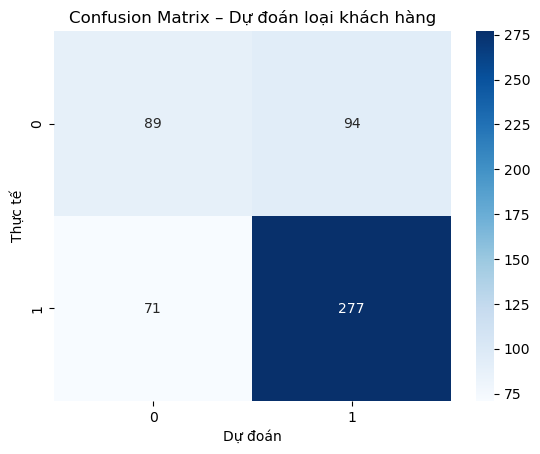

In [6]:
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title("Confusion Matrix – Dự đoán loại khách hàng") 
plt.xlabel("Dự đoán") 
plt.ylabel("Thực tế") 
plt.show()

#### Biểu đồ ROC, AUC

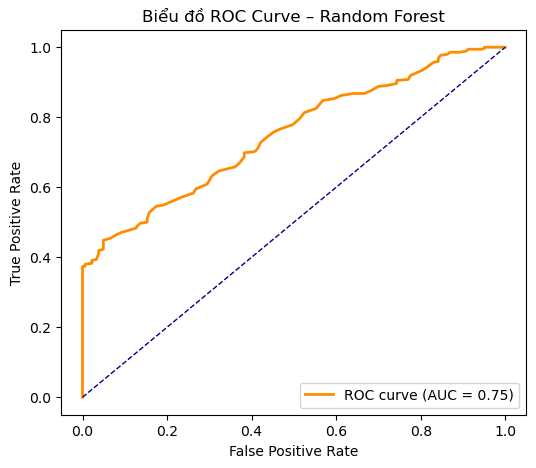

In [7]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Biểu đồ ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.show()


#### Biểu đồ thể hiện tầm quan trọng của biến

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19376\497130989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


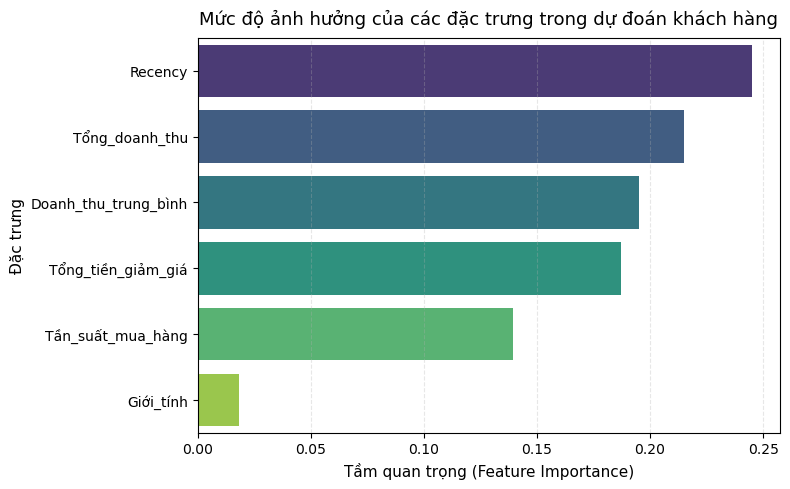

In [8]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")

plt.title('Mức độ ảnh hưởng của các đặc trưng trong dự đoán khách hàng', fontsize=13, pad=10)
plt.xlabel('Tầm quan trọng (Feature Importance)', fontsize=11)
plt.ylabel('Đặc trưng', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()